# 사회망 서비스(SNS)
- source : [백준 2533](https://www.acmicpc.net/problem/2533)
- 난이도 : 골드 III
- 분류 : 다이나믹 프로그래밍, 트리, 트리에서의 다이나믹 프로그래밍

## 문제
- 페이스북, 트위터, 카카오톡과 같은 사회망 서비스(SNS)가 널리 사용됨에 따라, 사회망을 통하여 사람들이 어떻게 새로운 아이디어를 받아들이게 되는가를 이해하는 문제가 중요해졌다. 사회망에서 사람들의 친구 관계는 그래프로 표현할 수 있는데,  이 그래프에서 사람은 정점으로 표현되고, 두 정점을 잇는 에지는 두 정점으로 표현되는 두 사람이 서로 친구 관계임을 표현한다. 

- 예를 들어, 철수와 영희, 철수와 만수, 영희와 순희가 서로 친구 관계라면 이를 표현하는 친구 관계 그래프는 다음과 같다. 

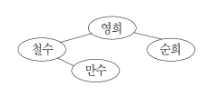

- 친구 관계 그래프를 이용하면 사회망 서비스에서 어떤 새로운 아이디어가 전파되는 과정을 이해하는데 도움을 줄 수 있다. 어떤 새로운 아이디어를 먼저 받아들인 사람을 얼리 아답터(early adaptor)라고 하는데, 사회망 서비스에 속한 사람들은 얼리 아답터이거나 얼리 아답터가 아니다. 얼리 아답터가 아닌 사람들은 자신의 모든 친구들이 얼리 아답터일 때만 이 아이디어를 받아들인다. 

- 어떤 아이디어를 사회망 서비스에서 퍼뜨리고자 할 때, 가능한 한 최소의 수의 얼리 아답터를 확보하여 모든 사람이 이 아이디어를 받아들이게 하는  문제는 매우 중요하다. 

- 일반적인 그래프에서 이 문제를 푸는 것이 매우 어렵다는 것이 알려져 있기 때문에, 친구 관계 그래프가 트리인 경우, 즉 모든 두 정점 사이에 이들을 잇는 경로가 존재하면서 사이클이 존재하지 않는 경우만 고려한다. 

- 예를 들어, 8명의 사람으로 이루어진 다음 친구 관계 트리를 생각해보자. 2, 3, 4번 노드가 표현하는 사람들이 얼리 아답터라면, 얼리 아답터가 아닌 사람들은 자신의 모든 친구가 얼리 아답터이기 때문에 새로운 아이디어를 받아들인다.

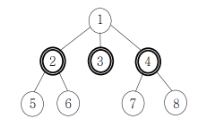

- 친구 관계 트리가 주어졌을 때, 모든 개인이 새로운 아이디어를 수용하기 위하여 필요한 최소 얼리 어답터의 수를 구하는 프로그램을 작성하시오.

## 입력
- 첫 번째 줄에는 친구 관계 트리의 정점 개수 N이 주어진다. 단, 2 ≤ N ≤ 1,000,000이며, 각 정점은 1부터 N까지 일련번호로 표현된다. 두 번째 줄부터 N-1개의 줄에는 각 줄마다 친구 관계 트리의 에지 (u, v)를 나타내는 두 정수 u와 v가 하나의 빈칸을 사이에 두고 주어진다. 

## 출력
- 주어진 친구 관계 그래프에서 아이디어를 전파하는데 필요한 얼리 아답터의 최소 수를 하나의 정수로 출력한다.

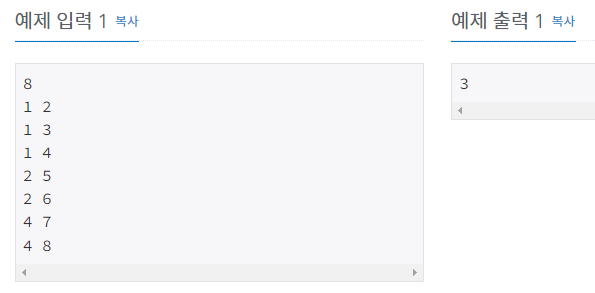

1. 노드가 얼리어답터 : dp[node][1]
2. 노드가 일반인     : dp[node][0]
- 위의 두 상태는 완전히 독립적 -> dp 적용 가능 

- 자식 노드가 얼리어답터가 하나도 없다면, 무조건 얼리어답터여야한다.
- 부모 노드가 얼리어탑터라면, 자식 노드는 얼리어답터여도 되고 아니어도 된다.

In [15]:
n = 8
arr = [
    [1, 2],
    [1, 3],
    [1, 4],
    [2, 5],
    [2, 6],
    [4, 7],
    [4, 8]]

graph = [[] for _ in range(n+1)]
for i in range(n-1):
    a, b = arr[i]
    graph[a].append(b)
    graph[b].append(a)

graph

[[], [2, 3, 4], [1, 5, 6], [1], [1, 7, 8], [2], [2], [4], [4]]

In [21]:
dp = [[0, 0] for _ in range(n+1)]
visited = [False] * (n+1)

def solve_dp(num):
    visited[num] = True
    dp[num][0] = 0
    dp[num][1] = 1 # 자기 자신을 얼리어답터로 포함
    print(dp)
    
    for i in graph[num]: # 자식 노드 순회
        if not visited[i]:
            solve_dp(i)
            dp[num][0] += dp[i][1]
            dp[num][1] += min(dp[i][0], dp[i][1]) # 내가 얼리어답터이고, 자식이 얼리어답터일 때와 아닐 때 중 최솟값 더하기

solve_dp(1)
print(min(dp[1][0], dp[1][1]))

[[0, 0], [0, 1], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0]]
[[0, 0], [0, 1], [0, 1], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0]]
[[0, 0], [0, 1], [0, 1], [0, 0], [0, 0], [0, 1], [0, 0], [0, 0], [0, 0]]
[[0, 0], [0, 1], [1, 1], [0, 0], [0, 0], [0, 1], [0, 1], [0, 0], [0, 0]]
[[0, 0], [1, 2], [2, 1], [0, 1], [0, 0], [0, 1], [0, 1], [0, 0], [0, 0]]
[[0, 0], [2, 2], [2, 1], [0, 1], [0, 1], [0, 1], [0, 1], [0, 0], [0, 0]]
[[0, 0], [2, 2], [2, 1], [0, 1], [0, 1], [0, 1], [0, 1], [0, 1], [0, 0]]
[[0, 0], [2, 2], [2, 1], [0, 1], [1, 1], [0, 1], [0, 1], [0, 1], [0, 1]]
3


 **최종 코드**

In [18]:
import sys
sys.setrecursionlimit(10**9)
inp = sys.stdin.readline

n = int(inp())
graph = [[] for _ in range(n+1)]
visited = [False] * (n+1)

for _ in range(n-1):
    a, b = map(int, inp().split())
    graph[a].append(b)
    graph[b].append(a)
    

dp = [[0, 0] for _ in range(n+1)]

def solve_dp(num):
    visited[num] = True
    dp[num][0] = 0
    dp[num][1] = 1 # 자기 자신을 얼리어답터로 포함
    
    for i in graph[num]: # 자식 노드 순회
        if not visited[i]:
            solve_dp(i)
            dp[num][0] += dp[i][1]
            dp[num][1] += min(dp[i][0], dp[i][1]) # 내가 얼리어답터이고, 자식이 얼리어답터일 때와 아닐 때 중 최솟값 더하기
        
solve_dp(1)
print(min(dp[1][0], dp[1][1]))

[[0, 0], [0, 1], [1, 1], [0, 0], [0, 0], [0, 1], [0, 0], [0, 0], [0, 0]]
[[0, 0], [0, 1], [2, 1], [0, 0], [0, 0], [0, 1], [0, 1], [0, 0], [0, 0]]
[[0, 0], [1, 2], [2, 1], [0, 0], [0, 0], [0, 1], [0, 1], [0, 0], [0, 0]]
[[0, 0], [2, 2], [2, 1], [0, 1], [0, 0], [0, 1], [0, 1], [0, 0], [0, 0]]
[[0, 0], [2, 2], [2, 1], [0, 1], [1, 1], [0, 1], [0, 1], [0, 1], [0, 0]]
[[0, 0], [2, 2], [2, 1], [0, 1], [2, 1], [0, 1], [0, 1], [0, 1], [0, 1]]
[[0, 0], [3, 3], [2, 1], [0, 1], [2, 1], [0, 1], [0, 1], [0, 1], [0, 1]]
3


- dp를 계속 확인하면서 그림을 그리니 이해가 조금 가는 것 같다.

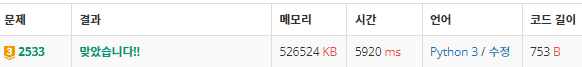
- [코드 출처](https://velog.io/@ayoung0073/baekjoon-2533-%EC%82%AC%ED%9A%8C%EB%A7%9D%EC%84%9C%EB%B9%84%EC%8A%A4)